In [10]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
import scipy
import random
import os
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


In [61]:
#use KN locations of simulated events in snana
def load_KN_locs(DIR): #load locations and times of all DAT files for KN in given directory 
    file_count = len([f for f in os.walk(DIR).next()[2] if f[-4:] == ".DAT"])
    KN_locations = np.zeros([file_count, 3])

    file_num = 0
    for file in os.listdir(DIR):  # run through all .dat files in the specified directory
        if file.endswith(".DAT"):
            obs, headerdict = parse_observations(DIR + file)
            KN_locations[file_num,:] = [headerdict['PEAKMJD'], headerdict['RA'], headerdict['DECL']]
            file_num += 1
    return KN_locations

KN_locations = load_KN_locs('../GW170817_AT2017gfo_LSST_WFD/')
print len(KN_locations)


145


In [24]:
#create random KN events
num_locations = 145
myKN_locations = np.zeros([num_locations,3])
for i in range(len(myKN_locations)):
    myKN_locations[i,:] = [random.uniform(59804,63180.9), random.uniform(0,360), random.uniform(-62,2)]
    #this range of values for DECL and PEAKMJD is the same range as those simulated in snana

In [ ]:
ra = Angle(np.array(libid_details)[0:10,1]*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = Angle(np.array(libid_details)[0:10,2]*u.degree)

#myra = Angle(myKN_locations[:,1]*u.degree)
##myra = ra.wrap_at(180*u.degree)
#mydec = Angle(myKN_locations[:,2]*u.degree)

print 'hi'

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian, marker='o')#, label='snana')
#ax.scatter(myra.radian, mydec.radian, marker='x', color='r', label='random')
ax.grid(True)

ax.xticks(fontsize=20)
ax.yticks(fontsize=20)

#plt.show()

#plt.title('Comparison of locations of KN simulated by snana and randomly located KN', size=16, fontweight='bold')
#plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
#fig.savefig('sky_plots/KN_loc_comparison')


hi


In [4]:
#LSST has a 9.6 deg2 field of view

#Creates a list of all pointings, with [LIBID, RA, DECL, MJD IDEXPT  FLT GAIN NOISE SKYSIG (pixels)  RATIO  ZPTAVG ZPTERR  MAG]
from parse_simlib import parse_simlib
os.chdir('/data/des41.a/data/jaortiz/snana-test/')

libid_details, pointings = parse_simlib('simlibs/minion_1016_WFD.simlib')

print len(pointings)

2083758


In [5]:
a = np.array(libid_details)[:,1]
for row in range(len(libid_details)):
    libid_details[row] = [float(i) for i in libid_details[row]]
    
a = np.array(libid_details)[:,1]
b = np.array(libid_details)[:,2]


print a, len(a)
print b, len(b)

[ 240.055336  119.944646  335.944636 ...,  140.812743  291.187293
   68.81269 ] 2293
[-62.021192 -62.021192 -62.021134 ...,   2.688031   2.688031   2.688031] 2293


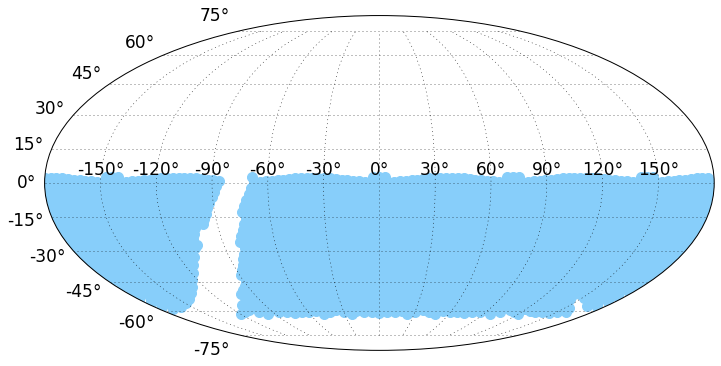

In [32]:
ra = Angle(a*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = Angle(b*u.degree)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="mollweide")

ax.scatter(ra.radian, dec.radian, marker='o', color='lightskyblue', s=100)
ax.grid(True)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

fig.savefig('figures/skyplot')


In [119]:
KN = KN_locations[1,:]

#get pointings in the next day
pointings_later = pointings[KN[0]<pointings[:,3], :]
pointings_nextday = pointings_later[pointings_later[:,3]<(KN[0]+0.5)]

print len(pointings_nextday)

709


In [7]:
from matplotlib.patches import Circle

ra = Angle(libid_details[:,1]*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = Angle(libid_details[:,2]*u.degree)

#KNra = Angle(KN[1]*u.degree)
#KNra = KNra.wrap_at(180*u.degree)
#KNdec = Angle(KN[2]*u.degree)


fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="molleweide")
ax.scatter(ra.radian, dec.radian, marker='o',alpha=0.1, label='LSST pointings')
#ax.plot(ra.radian, dec.radian,alpha=0.1, label='LSST pointings', color='black')
#ax.scatter(KNra.radian, KNdec.radian, marker='x', label='KN location', color='r')
ax.grid(True)

#plt.Circle((KNra.radian, KNdec.radian), 10)#np.sqrt(9.6/np.pi))

plt.title('LSST pointings in 12 hours following KN', size=16, fontweight='bold')
plt.legend(loc='lower right', bbox_to_anchor=(1.06, 0))
fig.savefig('sky_plots/12hrs_after_KN')


TypeError: list indices must be integers, not tuple